In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load Training Dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Imadittyaa/Customer_Churn_Prediction_Model_Project/main/customer_churn_dataset-training-master.csv')
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [4]:
df.dropna(inplace=True)

In [5]:
df.drop(columns='CustomerID',inplace=True)

In [6]:
cat_col=df.select_dtypes(include='object').columns

# Encoding

In [7]:
df=pd.get_dummies(df,columns=cat_col,drop_first=True)

In [8]:
df=df.astype(int)

In [9]:
df.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,30,39,14,5,18,932,17,1,0,0,1,0,0
1,65,49,1,10,8,557,6,1,0,0,0,1,0
2,55,14,4,6,18,185,3,1,0,0,0,0,1
3,58,38,21,7,7,396,29,1,1,0,1,1,0
4,23,32,20,5,8,617,20,1,1,0,0,1,0


In [10]:
x=df.drop(columns='Churn')
y=df['Churn']

# Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

# Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rf=RandomForestClassifier(n_estimators=300,random_state=42,n_jobs=1)

In [16]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=300, n_jobs=1, random_state=42)

In [17]:
pred_rf=rf.predict(x_test)

In [18]:
# Accuracy And Confusion matrx
accuracy_score(y_test,pred_rf)

0.9996483945240283

In [19]:
confusion_matrix(y_test,pred_rf)

array([[38167,     0],
       [   31, 49969]])

In [20]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38167
           1       1.00      1.00      1.00     50000

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



# Important Feature

In [21]:
feature_names=x.columns
importances=rf.feature_importances_

In [22]:
feat_imp=pd.DataFrame({'feature':feature_names,'importance':importances})

In [23]:
feat_imp.sort_values(by='importance',ascending=False,inplace=True)

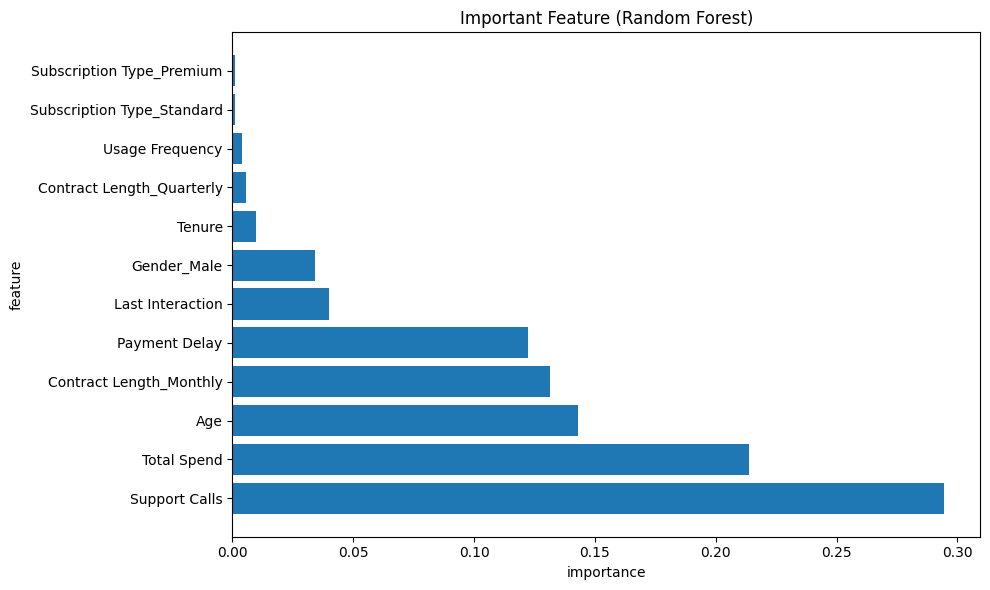

In [24]:
plt.figure(figsize=(10,6))
plt.barh(y=feat_imp['feature'],width=feat_imp['importance'])
plt.xlabel('importance')
plt.ylabel('feature')
plt.title('Important Feature (Random Forest)')
plt.tight_layout()
plt.show()

## Conclusions

Based on the analysis performed in this notebook, here are the main conclusions:

1.  **Data Loading and Preprocessing:**
    *   The customer churn dataset was successfully loaded.
    *   Missing values were handled by dropping rows with `NaN` values.
    *   The `CustomerID` column was dropped as it's not relevant for model training.
    *   Categorical features (`Gender`, `Subscription Type`, `Contract Length`) were effectively converted into numerical format using one-hot encoding (`pd.get_dummies`).
    *   All data types were converted to integers for consistency and model compatibility.

2.  **Model Training and Evaluation (Random Forest Classifier):**
    *   A Random Forest Classifier was trained on the preprocessed data, achieving very high performance.
    *   **Accuracy:** The model demonstrated an outstanding accuracy of approximately 99.96% on the test set.
    *   **Confusion Matrix:** The confusion matrix showed excellent classification, with a very low number of misclassifications, particularly for the 'Churn' class (only 31 false negatives out of 50000 'Churn' instances).
    *   **Classification Report:** Precision, recall, and F1-scores for both churn (1) and non-churn (0) classes were nearly 1.00, indicating a highly robust model.

3.  **Feature Importance:**
    *   The feature importance analysis revealed the most influential factors in predicting customer churn:
        *   **Support Calls:** This was identified as the most important feature, suggesting that the frequency or nature of support interactions significantly impacts churn.
        *   **Total Spend:** The total amount spent by a customer is also a critical indicator of churn.
        *   **Age:** The customer's age plays a notable role in predicting churn.
        *   **Contract Length_Monthly:** The type of contract length, specifically monthly contracts, was also found to be an important predictor.

In summary, the Random Forest model successfully predicted customer churn with high accuracy, and key drivers for churn were identified, particularly related to customer support interactions, total spending, and demographic factors like age.